# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from textwrap import dedent
import scipy.stats as st
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:

# Define an empty list to fetch the weather data for each city

city_name =[]
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counter
record_count = 1

# Loop through all the cities in our list to fetch weather data
for city in cities:

    # Log the url, record, and set numbers
    print("Processing Record %s | %s" % (record_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(response['name'])
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_clouds.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    continue
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | vaini
Processing Record 2 | rikitea
Processing Record 3 | burgeo
Processing Record 4 | kamaishi
Processing Record 5 | leland
Processing Record 6 | leh
Processing Record 7 | hilo
Processing Record 8 | arraial do cabo
Processing Record 9 | cape town
Processing Record 10 | hambantota
Processing Record 11 | ituni
City not found. Skipping...
Processing Record 12 | provideniya
Processing Record 13 | barentsburg
City not found. Skipping...
Processing Record 14 | castro
Processing Record 15 | broken hill
Processing Record 16 | port alfred
Processing Record 17 | punta arenas
Processing Record 18 | mareeba
Processing Record 19 | campoverde
Processing Record 20 | aklavik
Processing Record 21 | ushuaia
Processing Record 22 | new norfolk
Processing Record 23 | butaritari
Processing Record 24 | broome
Processing Record 25 | georgetown
Processing Record 26 | hobart
Processing Record 27 | puerto ayora
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_dict = {
    "City": city_name, 
    "Latitude": city_lat, 
    "Longitude": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date}

city_data_df = pd.DataFrame(city_dict)


# Show Record Count
city_data_df.count()

City          570
Latitude      570
Longitude     570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,28.09,83,75,6.17,TO,1675377098
1,Rikitea,-23.1203,-134.9692,26.33,70,79,5.96,PF,1675377098
2,Burgeo,47.6167,-57.6152,-5.60,76,100,6.58,CA,1675377099
3,Kamaishi,39.2667,141.8833,-3.01,62,44,2.33,JP,1675376808
4,Leland,34.2563,-78.0447,6.17,94,100,2.06,US,1675376948


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Vaini,-21.2000,-175.2000,28.09,83,75,6.17,TO,1675377098
1,Rikitea,-23.1203,-134.9692,26.33,70,79,5.96,PF,1675377098
2,Burgeo,47.6167,-57.6152,-5.60,76,100,6.58,CA,1675377099
3,Kamaishi,39.2667,141.8833,-3.01,62,44,2.33,JP,1675376808
4,Leland,34.2563,-78.0447,6.17,94,100,2.06,US,1675376948


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

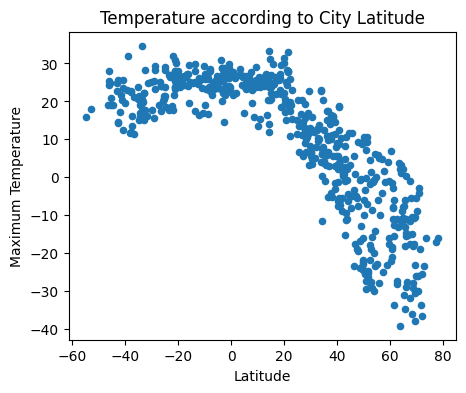

In [9]:
# Build scatter plot for latitude vs. temperature

#Add to scatterplot
lat_temp_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Max Temp",
        title="Temperature according to City Latitude", 
        ylabel="Maximum Temperature",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

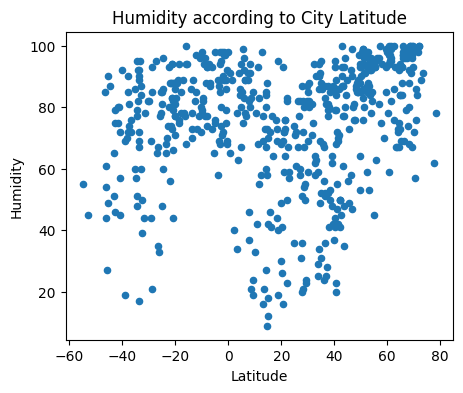

In [10]:
# Build the scatter plots for latitude vs. humidity

#Add to scatterplot
lat_hum_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Humidity",
        title="Humidity according to City Latitude", 
        ylabel="Humidity",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig2.png")

#### Latitude Vs. Cloudiness

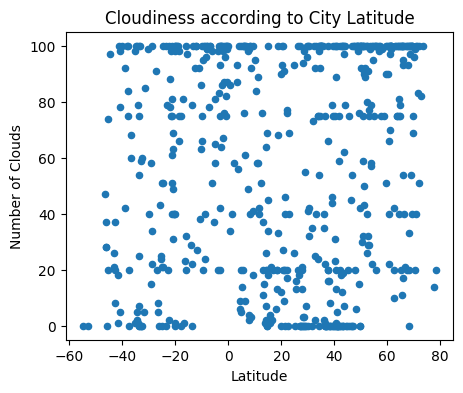

In [11]:
# Build the scatter plots for latitude vs. cloudiness

#Add to scatterplot
lat_cloud_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Cloudiness",
        title="Cloudiness according to City Latitude", 
        ylabel="Number of Clouds",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

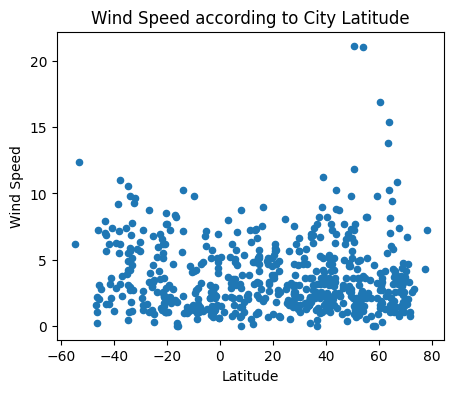

In [12]:
# Build the scatter plots for latitude vs. wind speed

#Add to scatterplot
lat_cloud_scatter = (
    city_data_df
    .plot
    .scatter(
        x="Latitude", 
        y="Wind Speed",
        title="Wind Speed according to City Latitude", 
        ylabel="Wind Speed",
        xlabel="Latitude",
        figsize=(5, 4))
    .get_figure())

# Save  the figure
lat_temp_scatter.savefig("output_data/Fig4.png")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linregplot(data, x_column, y_column, x_label, y_label, eqloc):
    
    #Made initial regression chart
    sns.lmplot(x=x_column,y=y_column,data=data,fit_reg=True) 
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    #Make equation and add it to chart
    x_values = data[x_column]
    y_values = data[y_column]

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,eqloc,fontsize=15,color="red")

    #Calculate correlation coefficient
    correlation_coef = round(st.pearsonr(x_values,y_values)[0],2)

    #Print correlation coeficciant
    print(f"The correlation coefficient is {correlation_coef}")

    #Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Latitude'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Burgeo,47.6167,-57.6152,-5.60,76,100,6.58,CA,1675377099
3,Kamaishi,39.2667,141.8833,-3.01,62,44,2.33,JP,1675376808
4,Leland,34.2563,-78.0447,6.17,94,100,2.06,US,1675376948
5,Leh,34.1667,77.5833,-11.47,86,98,0.20,IN,1675377099
6,Hilo,19.7297,-155.0900,30.16,68,0,5.14,US,1675376893


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Vaini,-21.2000,-175.2000,28.09,83,75,6.17,TO,1675377098
1,Rikitea,-23.1203,-134.9692,26.33,70,79,5.96,PF,1675377098
7,Arraial do Cabo,-22.9661,-42.0278,26.98,74,20,4.12,BR,1675377100
8,Cape Town,-33.9258,18.4232,19.23,69,0,9.77,ZA,1675376935
11,Castro,-24.7911,-50.0119,18.47,96,100,3.45,BR,1675377102


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient is -0.85


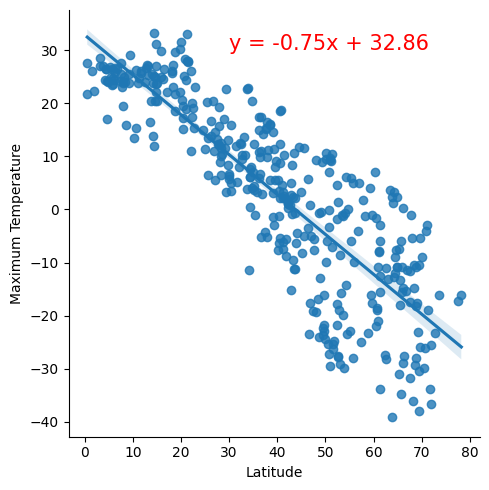

In [39]:
# Linear regression on Northern Hemisphere
linregplot(northern_hemi_df, "Latitude", "Max Temp", "Latitude", "Maximum Temperature", (30,30))

The correlation coefficient is 0.42


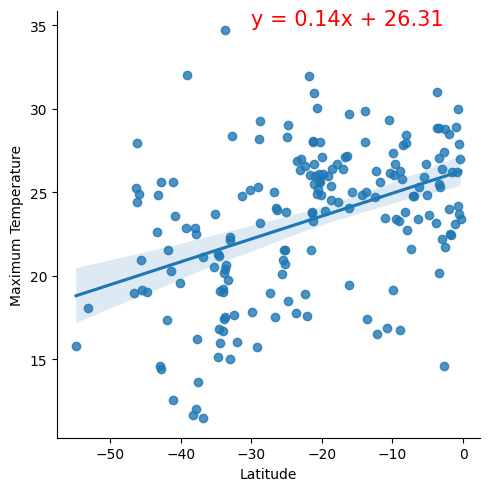

In [40]:
# Linear regression on Southern Hemisphere
linregplot(southern_hemi_df, "Latitude", "Max Temp", "Latitude", "Maximum Temperature", (-30,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient is 0.4


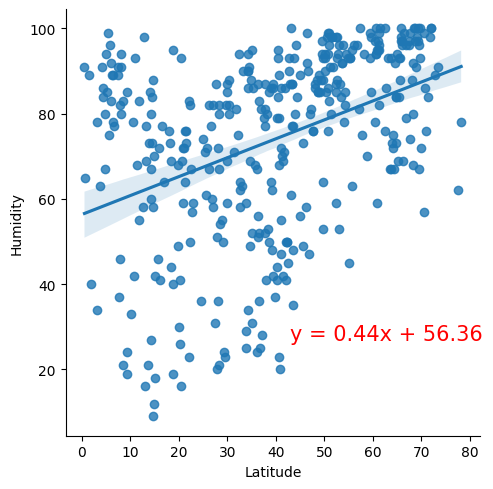

In [45]:
# Northern Hemisphere
linregplot(northern_hemi_df, "Latitude", "Humidity", "Latitude", "Humidity", (43,27))

The correlation coefficient is 0.43


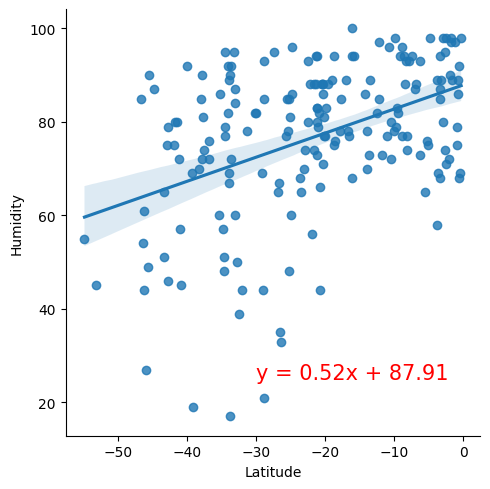

In [41]:
# Southern Hemisphere
linregplot(southern_hemi_df, "Latitude", "Humidity", "Latitude", "Humidity", (-30,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient is 0.27


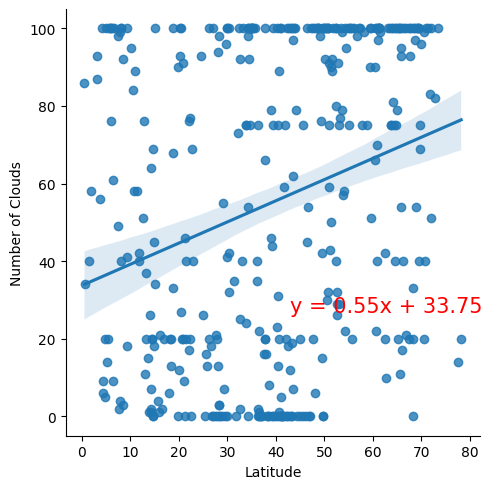

In [46]:
# Northern Hemisphere
linregplot(northern_hemi_df, "Latitude", "Cloudiness", "Latitude", "Number of Clouds", (43,27))

The correlation coefficient is 0.41


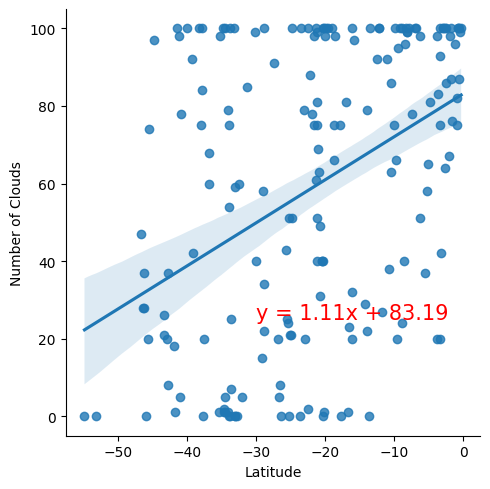

In [47]:
# Southern Hemisphere
linregplot(southern_hemi_df, "Latitude", "Cloudiness", "Latitude", "Number of Clouds", (-30,25))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient is 0.04


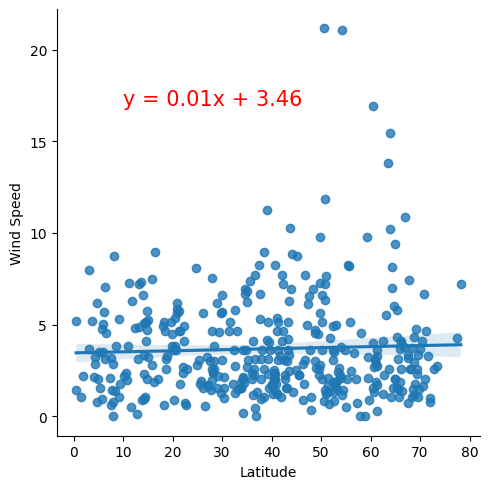

In [50]:
# Northern Hemisphere
linregplot(northern_hemi_df, "Latitude", "Wind Speed", "Latitude", "Wind Speed", (10,17))

The correlation coefficient is -0.29


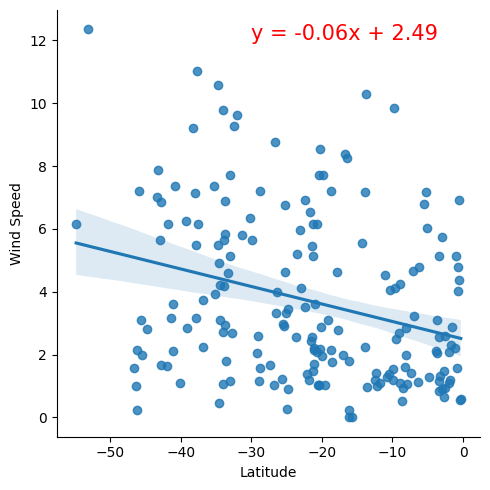

In [51]:
# Southern Hemisphere
linregplot(southern_hemi_df, "Latitude", "Wind Speed", "Latitude", "Wind Speed", (-30,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE